# Machine Learning - lab 3
## Logistic regression
### Adam Stasiak 

Library import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

## Binary logistic regression

Ex.0

In [3]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.shape

(100, 3)

In [5]:
data_to_plot1 = data.loc[data["Admitted"]==0]

In [6]:
data_to_plot1.shape

(40, 3)

In [7]:
data_to_plot2 = data.loc[data["Admitted"]==1]

In [8]:
data_to_plot2.shape

(60, 3)

In [9]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Ex. 1 

In [10]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

In [11]:
theta = np.zeros((X.shape[0]+1, 1))

In [12]:
X = np.concatenate([np.ones([1,X.shape[1]]),X])


In [13]:
for i in range(1,X.shape[0]):
    X[i,:] = (X[i,:] - np.mean(X[i,:])) / (np.std(X[i,:]))

Ex.2

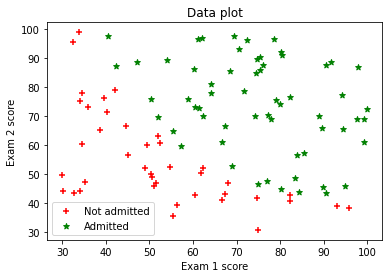

In [14]:
plt.scatter(data_to_plot1['Exam 1'].values,data_to_plot1['Exam 2'].values,color='red',marker='+',label='Not admitted')
plt.scatter(data_to_plot2['Exam 1'].values,data_to_plot2['Exam 2'].values,color='green',marker='*',label='Admitted')
plt.title('Data plot')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

Ex.3 

In [15]:
def sig(t):
    return 1/(1 + np.power(np.e,-t))

Ex.4

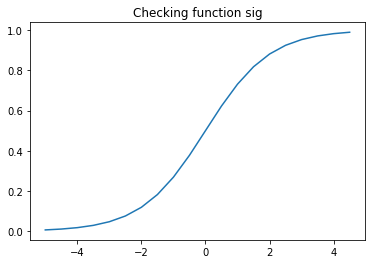

In [16]:
exam = np.arange(-5,5,0.5)
exam_res = sig(exam)

plt.plot(exam,exam_res)
plt.title('Checking function sig')
plt.show()

Ex.5

In [17]:
def hipothesis(X,theta):
    h = np.transpose(theta)@X
    return h


In [18]:
def cost(theta,X,y):
    h = hipothesis(X,theta)
    h_theta = sig(h)
    m = y.shape[1]
    J = np.sum(-y*np.log(h_theta)- (1-y)*np.log(1-h_theta))/m
    return J

In [19]:
theta = np.zeros((X.shape[0], 1))

J = cost(theta,X,y)
print(J)

0.6931471805599453


Ex.6

In [20]:
def simple_gradient(X, y, theta, alpha, it):
    theta = theta
    J = []
    m = y.shape[1]
    for i in range(it):
        theta = (theta - alpha * np.transpose((sig(hipothesis(X,theta))-y)@X.T)/m)
        J.append(cost(theta,X,y))
    return theta,J

In [21]:
alpha = 1
it = 150

In [22]:
theta ,J = simple_gradient(X,y,theta,alpha,it)
print(theta)
print(J[-1])

[[1.41957362]
 [3.35941597]
 [3.11271333]]
0.2064071430444978


Ex.7

In [23]:
pred_val = np.round(sig(hipothesis(X,theta)))
cnt = 0
for i in range(y.shape[1]):
    if pred_val[0][i] != y[0][i]:
        cnt +=1
accuracy = cnt/y.shape[1] * 100 
print("accuracy of algorithm is: {}".format(accuracy))

accuracy of algorithm is: 11.0


Ex.8

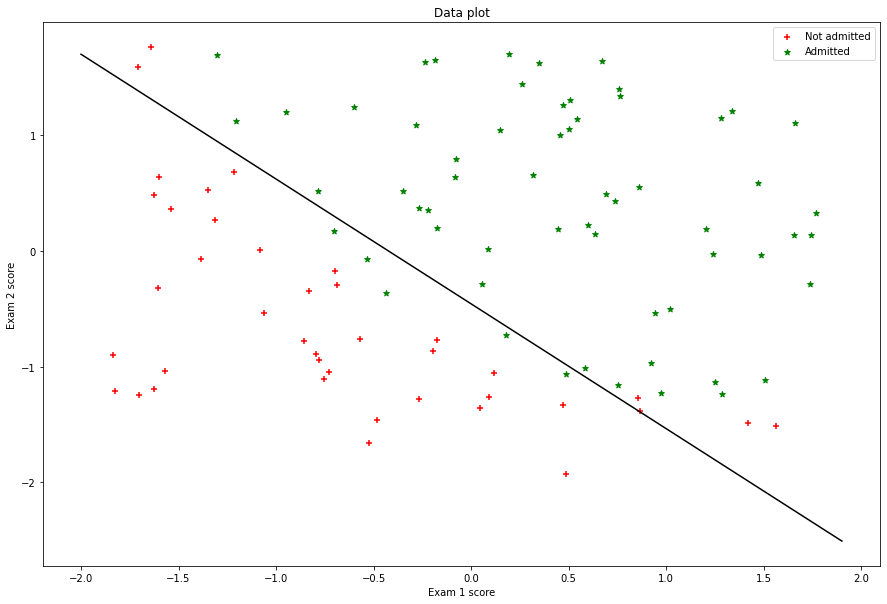

In [24]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.figure(figsize=(15,10))
plt.plot(x1, x2,color='black')
plt.scatter(X1_0,X2_0,color='red',marker='+',label='Not admitted')
plt.scatter(X1_1,X2_1,color='green',marker='*',label='Admitted')
plt.title('Data plot')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

## Logistic regression Python

Ex.1

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [26]:
X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(Y),test_size= 0.3,shuffle=True)

In [27]:
log_reg = LogisticRegression(fit_intercept=True,solver='newton-cg').fit(X_train ,y_train)

print("Coefficients {} ".format(log_reg.coef_))

Coefficients [[-2.4280786   1.95928133]
 [ 0.56273947 -1.49431923]
 [ 1.86533913 -0.4649621 ]] 


Ex.3 and Ex.4

In [28]:
reg_val = log_reg.predict(X_test)

residual = reg_val - y_test

MAE = np.abs(residual).mean()
MSE = np.square(residual).mean()
RMSE = np.sqrt(np.square(residual)).mean()
print("MAE: {:.2f} ".format(MAE))
print("MSE: {:.2f}".format(MSE))
print("RMSE: {:.2f}".format(RMSE))

MAE: 0.18 
MSE: 0.18
RMSE: 0.18


In [29]:
print(reg_val)

[0 0 2 2 2 1 1 0 2 0 1 0 1 1 0 0 1 0 0 0 1 1 2 0 0 2 2 0 2 0 1 2 2 0 0 2 0
 2 2 1 2 0 1 0 1]


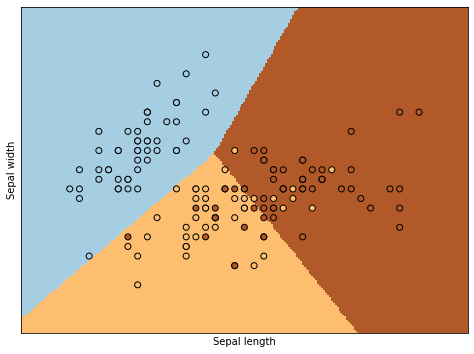

In [30]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()


In [35]:
predictions = log_reg.predict_proba(X_train)
print(predictions[0:5])

[[0.02923128 0.5297524  0.44101632]
 [0.9412006  0.02252881 0.03627059]
 [0.8937095  0.0725454  0.0337451 ]
 [0.05974044 0.6234659  0.31679366]
 [0.00826322 0.3348468  0.65688998]]


In [36]:
residual = reg_val - y_test

MAE = np.abs(residual).mean()
MSE = np.square(residual).mean()
RMSE = np.sqrt(np.square(residual)).mean()
print("MAE: {:.2f} ".format(MAE))
print("MSE: {:.2f}".format(MSE))
print("RMSE: {:.2f}".format(RMSE))

MAE: 0.18 
MSE: 0.18
RMSE: 0.18
